## <b>Tesla stock data from 2010 to 2020</b>

### We need to build a linear regression to predict the adjusted closing price (Adj Close) using the nformation from dataset. The goal is to create a model that, based on these two inputs, can predict the future value of Adj Close for a given year and opening price.

#### The dataset contains the following information about stock prices from 2010 to 2020:
- Date.
- Open price.
- High price.
- Low price.
- Close price.
- Adjusted price.
- Volume.

To begin building a linear regression, we need to prepare a cleaned, logical (i.e., outlier-free) dataset. Let's get started.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

sns.set_theme()

In [3]:
df = pd.read_csv("C:/Users/Liza Polozenko/OneDrive/Рабочий стол/ML/DATA SCIENCE/python CODE/regression/linear regression/linear regression with stocks/dataset/TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


C:\Users\Liza Polozenko\AppData\Local\Temp\ipykernel_10436\2848234100.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


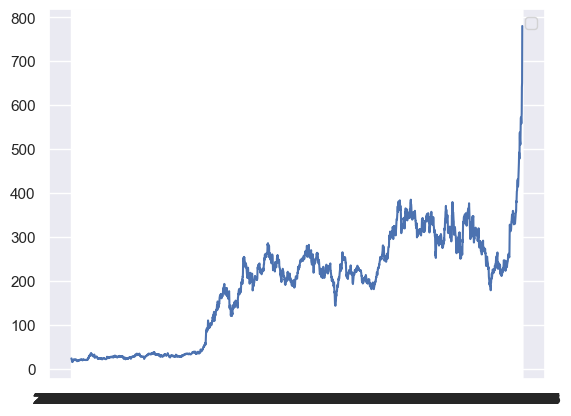

In [4]:
plt.plot(df['Date'], df['Adj Close'])
plt.legend()
plt.show()

We can see all the data contained in the dataset. The <b>full</b> dataset description will tell us much more about the dataset.

In [5]:
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,2416,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
unique,2416,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,NaN,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,NaN,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,NaN,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,NaN,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,NaN,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06


The close price and adjusted price are equal, so we can delete one of the columns.

In [6]:
data = df.drop(['Close'], axis=1)
data.describe(include='all')

,Date,Open,High,Low,Adj Close,Volume
count,2416,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
unique,2416,NaN,NaN,NaN,NaN,NaN
top,2020-01-09,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,NaN,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,NaN,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,NaN,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,NaN,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,NaN,266.450012,270.927513,262.102501,266.774994,7.361150e+06


A *count* in which all the numbers are equal indicates that there are **no missing values**. Good.

The *mean*, *min*, and *max* will explain whether there are **outliers** in the dataset.

Let's build a distplot for **Open** to find out exactly what emissions we are talking about.

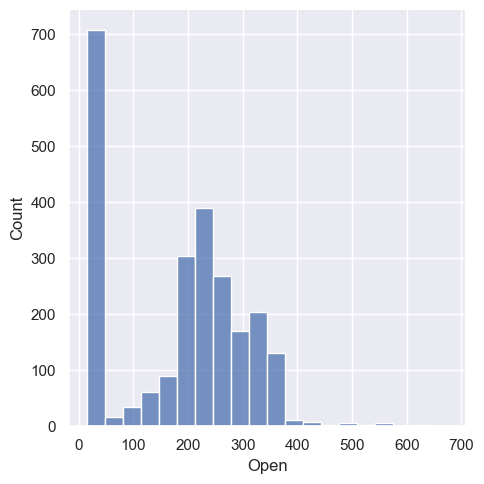

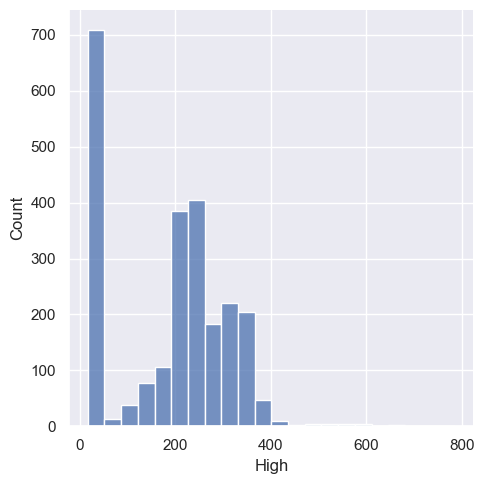

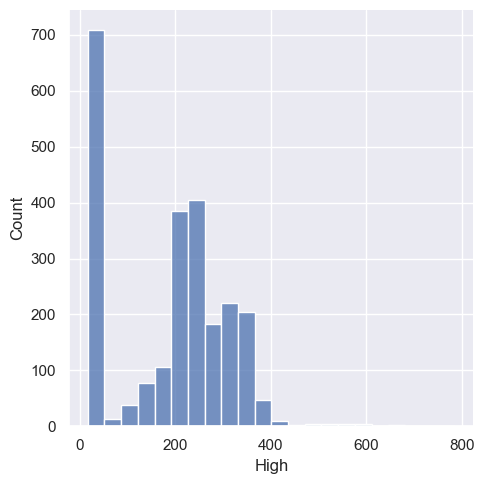

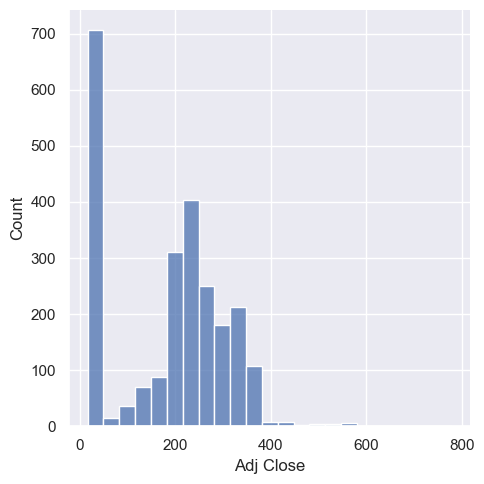

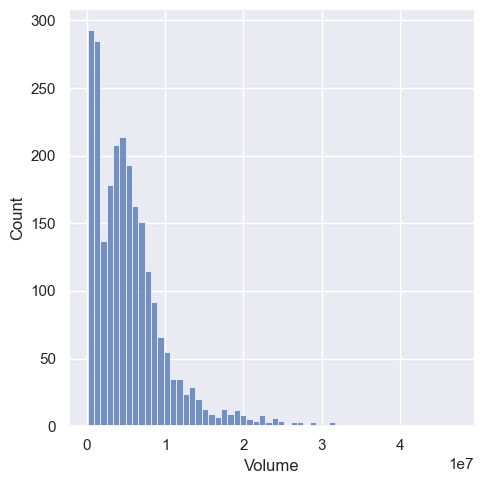

In [7]:
sns.displot(data['Open'])
sns.displot(data['High'])
sns.displot(data['High'])
sns.displot(data['Adj Close'])
sns.displot(data['Volume'])

Outliers do exist, and they will interfere with the accuracy of the regression. We can remove the top 1% of values.

In [8]:
columns_quantiles = ['Open', 'Low', 'High', 'Adj Close', 'Volume']
q = 0.98

for col in columns_quantiles:
    q_val = data[col].quantile(q)
    data_1 = data[data[col]<q_val]

data_1.describe(include='all')

,Date,Open,High,Low,Adj Close,Volume
count,2367,2367.000000,2367.000000,2367.000000,2367.000000,2.367000e+03
unique,2367,NaN,NaN,NaN,NaN,NaN
top,2020-01-31,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,184.585911,187.703147,181.324943,184.624668,5.143413e+06
std,NaN,117.423016,119.231074,115.567485,117.515541,3.976144e+06
min,NaN,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,NaN,34.009998,34.655000,33.420000,34.134998,1.812150e+06
50%,NaN,212.649994,216.500000,208.520004,212.369995,4.490700e+06
75%,NaN,264.704987,269.349990,260.814987,265.415008,7.135600e+06


Now about Date. Date type is object. Let's convert it to date type.

In [9]:
data_1['Date'] = pd.to_datetime(data_1['Date'])
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2367 entries, 0 to 2414
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2367 non-null   datetime64[ns]
 1   Open       2367 non-null   float64       
 2   High       2367 non-null   float64       
 3   Low        2367 non-null   float64       
 4   Adj Close  2367 non-null   float64       
 5   Volume     2367 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 129.4 KB


C:\Users\Liza Polozenko\AppData\Local\Temp\ipykernel_10436\165382190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Date'] = pd.to_datetime(data_1['Date'])


In [10]:
data_1['Year'] = data_1['Date'].dt.year
data_1.drop(['Date'], axis=1, inplace=True)
data_1.describe(include='all')

C:\Users\Liza Polozenko\AppData\Local\Temp\ipykernel_10436\3108995628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Year'] = data_1['Date'].dt.year
C:\Users\Liza Polozenko\AppData\Local\Temp\ipykernel_10436\3108995628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.drop(['Date'], axis=1, inplace=True)


,Open,High,Low,Adj Close,Volume,Year
count,2367.000000,2367.000000,2367.000000,2367.000000,2.367000e+03,2367.000000
mean,184.585911,187.703147,181.324943,184.624668,5.143413e+06,2014.741022
std,117.423016,119.231074,115.567485,117.515541,3.976144e+06,2.774129
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,2010.000000
25%,34.009998,34.655000,33.420000,34.134998,1.812150e+06,2012.000000
50%,212.649994,216.500000,208.520004,212.369995,4.490700e+06,2015.000000
75%,264.704987,269.349990,260.814987,265.415008,7.135600e+06,2017.000000
max,640.000000,653.000000,632.520020,650.570007,2.077540e+07,2020.000000


In [11]:
data_cleaned = data_1.reset_index(drop=True)
data_cleaned

,Open,High,Low,Adj Close,Volume,Year
0,19.000000,25.000000,17.540001,23.889999,18766300,2010
1,25.790001,30.420000,23.299999,23.830000,17187100,2010
2,25.000000,25.920000,20.270000,21.959999,8218800,2010
3,23.000000,23.100000,18.709999,19.200001,5139800,2010
4,20.000000,20.000000,15.830000,16.110001,6866900,2010
...,...,...,...,...,...,...
2362,570.630005,573.859985,554.260010,564.820007,14353600,2020
2363,541.989990,564.440002,539.280029,558.020020,13608100,2020
2364,568.489990,576.809998,558.080017,566.900024,11788500,2020
2365,575.690002,589.799988,567.429993,580.989990,17801500,2020


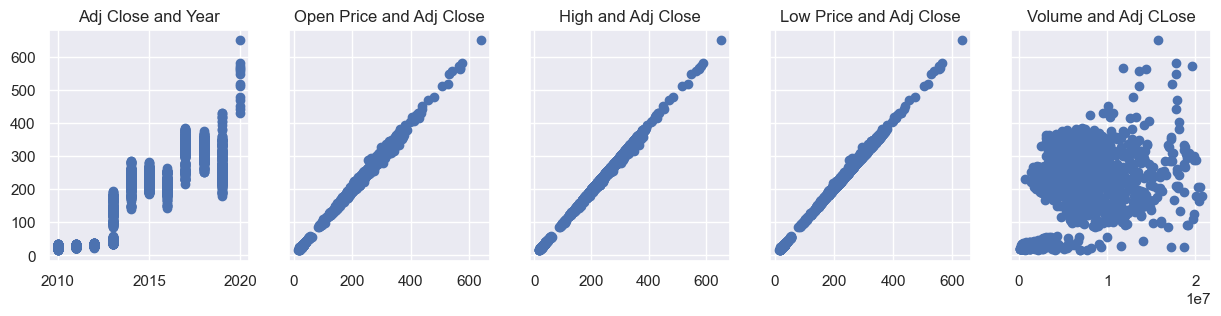

In [12]:
f, (ax1,ax2,ax3, ax4, ax5) = plt.subplots(1,5, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Adj Close'])
ax1.set_title('Adj Close and Year')
ax2.scatter(data_cleaned['Open'], data_cleaned['Adj Close'])
ax2.set_title('Open Price and Adj Close')
ax3.scatter(data_cleaned['High'], data_cleaned['Adj Close'])
ax3.set_title('High and Adj Close')
ax4.scatter(data_cleaned['Low'], data_cleaned['Adj Close'])
ax4.set_title('Low Price and Adj Close')
ax5.scatter(data_cleaned['Volume'], data_cleaned['Adj Close'])
ax5.set_title('Volume and Adj CLose')

plt.show()

We see a relationship between all the data except Volume and Adj Close. Indeed, the number of stocks sold will not help us predict the price in 2030. Before deleting, we will check the linear and nonlinear dependence to make sure that the column can be deleted.

In [13]:
corr_spearman = data_cleaned[['Volume', 'Adj Close']].corr(method='spearman')
corr_spearman


,Volume,Adj Close
Volume,1.000000,0.628522
Adj Close,0.628522,1.000000


In [14]:
corr_pearson = data_cleaned[['Volume', 'Adj Close']].corr(method='pearson')
corr_pearson

,Volume,Adj Close
Volume,1.000000,0.561933
Adj Close,0.561933,1.000000


In [15]:
data_cleaned.drop(['Volume'], axis=1, inplace=True)
data_cleaned

,Open,High,Low,Adj Close,Year
0,19.000000,25.000000,17.540001,23.889999,2010
1,25.790001,30.420000,23.299999,23.830000,2010
2,25.000000,25.920000,20.270000,21.959999,2010
3,23.000000,23.100000,18.709999,19.200001,2010
4,20.000000,20.000000,15.830000,16.110001,2010
...,...,...,...,...,...
2362,570.630005,573.859985,554.260010,564.820007,2020
2363,541.989990,564.440002,539.280029,558.020020,2020
2364,568.489990,576.809998,558.080017,566.900024,2020
2365,575.690002,589.799988,567.429993,580.989990,2020


### Let`s talk about multicolinearity

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Open', 'High', 'Low', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif


,VIF,features
0,6291.867547,Open
1,6111.846191,High
2,5378.682920,Low
3,3.518752,Year


We see that multicollinearity in Open, Hogh, and Low is very high! Let's conduct a correlation analysis.

In [17]:
data_cleaned[['Open', 'High', 'Low']].corr()

,Open,High,Low
Open,1.000000,0.999642,0.999595
High,0.999642,1.000000,0.999582
Low,0.999595,0.999582,1.000000


The relationship between these three variables is indeed **very strong**. We can leave only one of these three variables.

In [18]:
data_cleaned.drop(['High'], axis=1, inplace=True)
data_cleaned.drop(['Low'], axis=1, inplace=True)
data_cleaned

,Open,Adj Close,Year
0,19.000000,23.889999,2010
1,25.790001,23.830000,2010
2,25.000000,21.959999,2010
3,23.000000,19.200001,2010
4,20.000000,16.110001,2010
...,...,...,...
2362,570.630005,564.820007,2020
2363,541.989990,558.020020,2020
2364,568.489990,566.900024,2020
2365,575.690002,580.989990,2020


## Linear Regression Model

### Declare the inputs and the targets

In [19]:
inputs = data_cleaned[['Open', 'Year']]
target = data_cleaned['Adj Close']

### Scale the data

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [21]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)


### Create the regression

In [23]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [24]:
y_hat = reg.predict(x_train)
y_hat


array([204.37296505, 314.77341498, 300.82103649, ...,  33.30271029,
       146.79954343, 166.89532498], shape=(1893,))

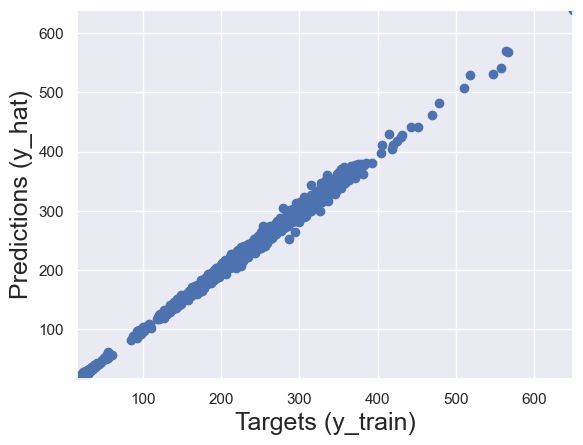

In [25]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(min(y_train), max(y_train))
plt.ylim(min(y_hat), max(y_hat))
plt.show()

The difference between them (y_train - y_hat) shows how much the model's predictions differ from the actual values. If this difference is close to zero, it means that the model predicts the values ​​well.

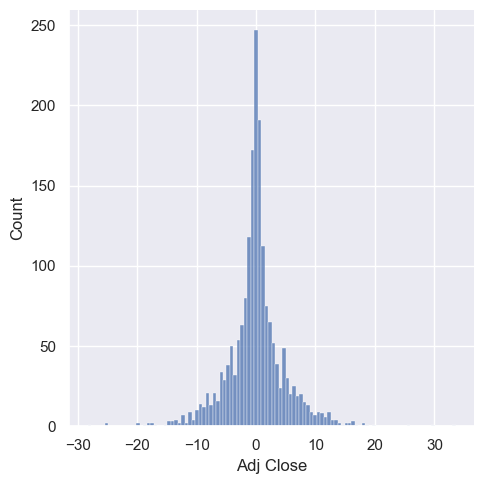

In [26]:
sns.displot(y_train - y_hat)

Let's calculate $$ R^2 $$

In [27]:
reg.score(x_train, y_hat)

1.0

### Testing

In [28]:
y_hat_test = reg.predict(x_test)

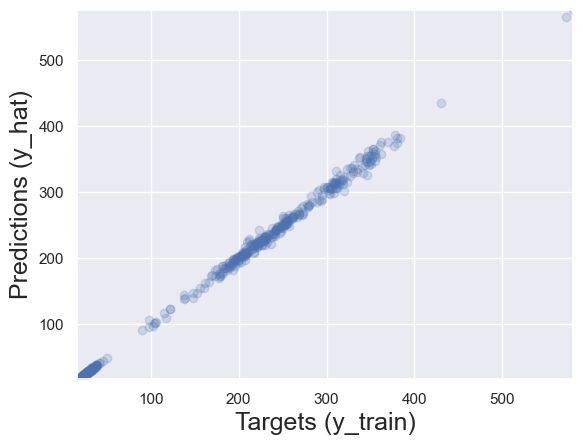

In [29]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_hat_test), max(y_hat_test))
plt.show()

In [30]:
df_pf = pd.DataFrame(y_hat_test, columns=['predictions'])
y_test = y_test.reset_index(drop=True)

df_pf['targets'] = y_test
df_pf['residual'] = df_pf['targets'] - df_pf['predictions']
df_pf['differnce%'] = np.absolute(df_pf['residual']/df_pf['targets']*100)
df_pf

,predictions,targets,residual,differnce%
0,226.537176,228.100006,1.562830,0.685151
1,199.443338,194.470001,-4.973337,2.557380
2,33.910465,33.410000,-0.500465,1.497951
3,188.643236,181.880005,-6.763231,3.718513
4,260.943997,252.539993,-8.404004,3.327791
...,...,...,...,...
469,29.397137,29.799999,0.402862,1.351886
470,164.055808,166.059998,2.004190,1.206907
471,216.458328,207.279999,-9.178329,4.427986
472,31.533161,31.270000,-0.263161,0.841576


In [31]:
df_pf.describe(include='all')

,predictions,targets,residual,differnce%
count,474.000000,474.000000,474.000000,474.000000
mean,179.360902,178.876920,-0.483982,1.918482
std,118.439764,117.975472,4.755304,1.878738
min,17.309618,16.110001,-21.185707,0.004273
25%,32.433420,32.229999,-1.916067,0.603792
50%,207.185614,207.139999,-0.113871,1.470035
75%,261.701852,259.315010,1.118384,2.604980
max,575.518503,580.989990,20.679466,22.412851


In [32]:
new_data = np.array([[19, 2010]])

In [33]:
new_data_scaled = scaler.transform(new_data)

c:\Users\Liza Polozenko\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
reg.predict(new_data_scaled)

array([18.72439176])